In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00


# Prepare the Data

In [4]:
from datasets import load_dataset

dataset = load_dataset("sem_eval_2010_task_8")

train_set = dataset['train']
test_set = dataset['test']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/8000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2717 [00:00<?, ? examples/s]

## Mapping the labels (19 relation form) to the names

In [5]:
import pandas as pd
dic1= {0: 'Cause-Effect(e1,e2)',
            1: 'Cause-Effect(e2,e1)',
            2: 'Component-Whole(e1,e2)',
            3: 'Component-Whole(e2,e1)',
            4: 'Content-Container(e1,e2)',
            5: 'Content-Container(e2,e1)',
            6: 'Entity-Destination(e1,e2)',
            7: 'Entity-Destination(e2,e1)',
            8: 'Entity-Origin(e1,e2)',
            9: 'Entity-Origin(e2,e1)',
            10: 'Instrument-Agency(e1,e2)',
            11: 'Instrument-Agency(e2,e1)',
            12: 'Member-Collection(e1,e2)',
            13: 'Member-Collection(e2,e1)',
            14: 'Message-Topic(e1,e2)',
            15: 'Message-Topic(e2,e1)',
            16: 'Product-Producer(e1,e2)',
            17: 'Product-Producer(e2,e1)',
            18:'Other'}
train_df= pd.DataFrame(train_set)
test_df= pd.DataFrame(test_set)

## Mapping the names to the 10 relation form label

In [6]:
train_df['R']=train_df['relation'].map(dic1)
test_df['R']=test_df['relation'].map(dic1)
dic2= {'Cause-Effect(e1,e2)': 0,
            'Cause-Effect(e2,e1)': 0,
            'Component-Whole(e1,e2)': 1,
            'Component-Whole(e2,e1)': 1,
            'Content-Container(e1,e2)': 2,
            'Content-Container(e2,e1)': 2,
            'Entity-Destination(e1,e2)': 3,
            'Entity-Destination(e2,e1)': 3,
            'Entity-Origin(e1,e2)': 4,
            'Entity-Origin(e2,e1)': 4,
            'Instrument-Agency(e1,e2)': 5,
            'Instrument-Agency(e2,e1)': 5,
            'Member-Collection(e1,e2)': 6,
            'Member-Collection(e2,e1)': 6,
            'Message-Topic(e1,e2)': 7,
            'Message-Topic(e2,e1)': 7,
            'Product-Producer(e1,e2)': 8,
            'Product-Producer(e2,e1)': 8,
            'Other': 9}
train_df['relation']=train_df['R'].map(dic2)
test_df['relation']=test_df['R'].map(dic2)

In [7]:
train_df

,sentence,relation,R
0,The system as described above has its greatest...,1,"Component-Whole(e2,e1)"
1,The <e1>child</e1> was carefully wrapped and b...,9,Other
2,The <e1>author</e1> of a keygen uses a <e2>dis...,5,"Instrument-Agency(e2,e1)"
3,A misty <e1>ridge</e1> uprises from the <e2>su...,9,Other
4,The <e1>student</e1> <e2>association</e2> is t...,6,"Member-Collection(e1,e2)"
...,...,...,...
7995,When the <e1>notice</e1> is sent by <e2>fax</e...,9,Other
7996,The <e1>herbicide</e1> is derived from a natur...,4,"Entity-Origin(e1,e2)"
7997,"To test this, we placed a kitchen <e1>match</e...",3,"Entity-Destination(e1,e2)"
7998,The farmers and city officials in the region h...,9,Other


In [8]:
pd.value_counts(train_df['relation'])

9    1410
0    1003
1     941
3     845
8     717
4     716
6     690
7     634
2     540
5     504
Name: relation, dtype: int64

In [9]:
pd.value_counts(test_df['relation'])

9    454
0    328
1    312
3    292
7    261
4    258
6    233
8    231
2    192
5    156
Name: relation, dtype: int64

In [10]:
if train_df['relation'].isna().values.any():
  print('yes')

## Data distribution

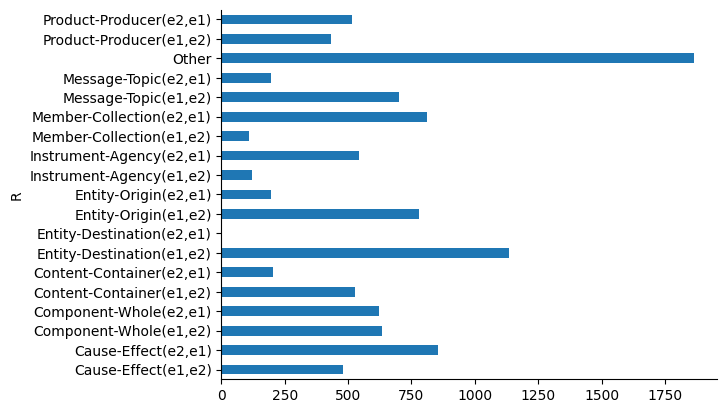

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

all_data = pd.concat([train_df, test_df])
all_data.groupby('R').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

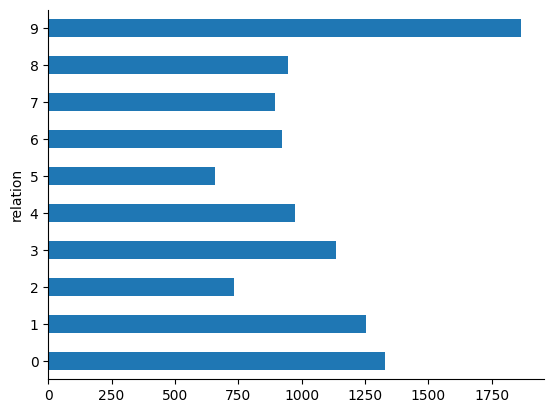

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

all_data = pd.concat([train_df, test_df])
all_data.groupby('relation').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Data Preprocessing

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Functions for text cleaning and lemmatization (as provided earlier)

def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

def tokenize_and_lemmatize(sentence):
    tokens = word_tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = []
    for word, tag in nltk.pos_tag(tokens):
        wntag = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=wntag) if wntag else lemmatizer.lemmatize(word)
        lemmatized_output.append(lemma)
    return lemmatized_output

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [14]:
# Extract and preprocess sentences
train_sentences = [' '.join(tokenize_and_lemmatize(clean_text(example['sentence']))) for example in train_set]
test_sentences = [' '.join(tokenize_and_lemmatize(clean_text(example['sentence']))) for example in test_set]

In [15]:
from datasets import load_dataset
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Extract sentences and relations
train_relations = list(train_df['relation'].values)
test_relations = list(test_df['relation'].values)


# Initialize the tokenizer and build the vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences + test_sentences)

# Convert the sentences to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Pad the sequences to have the same length
max_length = max(max(len(sequence) for sequence in train_sequences), max(len(sequence) for sequence in test_sequences))
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='pre')
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='pre')


# Now you have the padded sequences equivalent to the ones shown in the image
print("some padded train sequences:")
print(padded_train_sequences[:2])

print("\nsome padded test sequences:")
print(padded_test_sequences[:2])


some padded train sequences:
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     1   128     2
    221   395     9    16   101   809     6    17 11199  4179     3  2968
   4180]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     1  2548


In [16]:
from datasets import load_dataset
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert labels to one-hot encoding
num_classes = len(set(train_relations + test_relations))
train_labels_one_hot = to_categorical(train_relations, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_relations, num_classes=num_classes)
all_labels_one_hot= np.concatenate([train_labels_one_hot, test_labels_one_hot])
all_labels= np.concatenate([train_relations, test_relations])


# Model
Based on the article, the model has defined.
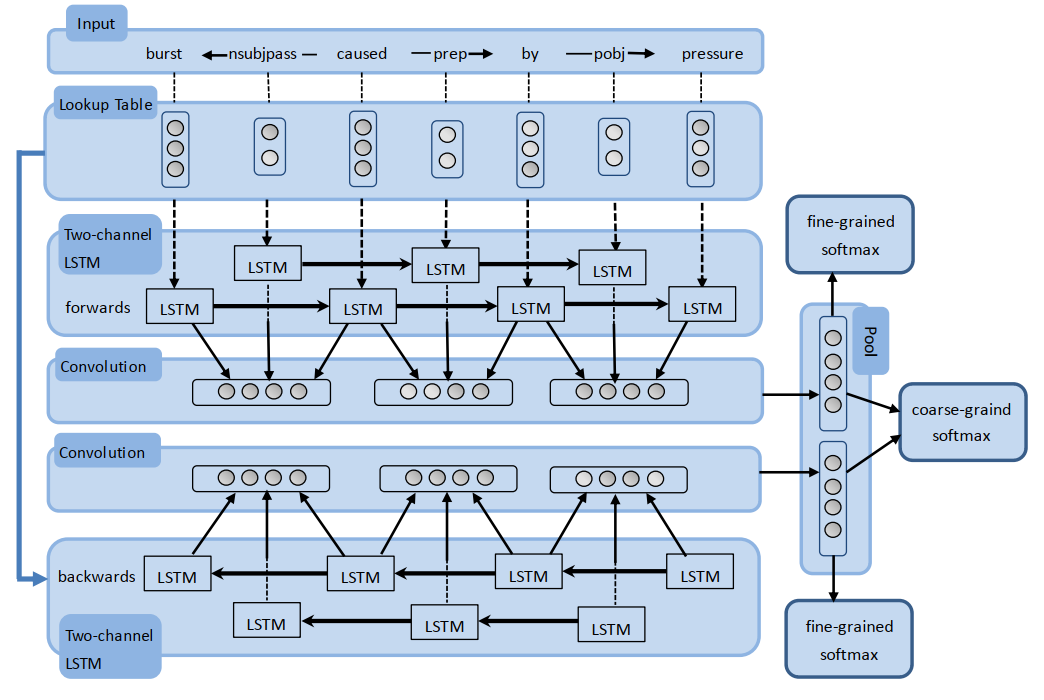

In [17]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

27313

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Reshape, LSTM, Dense, Input, Concatenate, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2

# Define hyperparameters
embedding_dim = 200
n_filters = 32
output_dim = num_classes
dropout = 0.7
max_length = max_length
l2_lambda = 0.001  # L2 regularization factor, based on article

# Input layer
inputs = Input(shape=(max_length,))

# Embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim)(inputs)




# LSTM layer
lstm_in = LSTM(n_filters)(embedding_layer)

# # Reshape for convolution
reshape_1 = Reshape((1, -1))(lstm_in)

conv11= Conv1D(16, 1, activation='relu')(reshape_1)
conv12=Conv1D(8, 1, activation='relu')(conv11)
mp1= MaxPooling1D(1)(conv12)


# Backward LSTM layer, based on article
lstm_out = LSTM(n_filters, go_backwards= True)(embedding_layer)

reshape_2 = Reshape((1, -1))(lstm_out)

conv21= Conv1D(16, 1, activation='relu')(reshape_2)
conv22=Conv1D(8, 1, activation='relu')(conv21)
mp2= MaxPooling1D(1)(conv22)


# Concatenate LSTM and convolution outputs
combined = Concatenate()([mp1, mp2])
combined= Flatten()(combined)



# Fully connected layers for fine-grained classification, based on article
fc_fine = Dense(output_dim, activation='softmax', name='fine_grained',
                kernel_regularizer=l2(l2_lambda),
                bias_regularizer=l2(l2_lambda))(combined)

fc_coarse = Dense(output_dim, activation='softmax', name='coarse_grained',
                  kernel_regularizer=l2(l2_lambda),
                  bias_regularizer=l2(l2_lambda))(combined)


# Create model
model = Model(inputs=inputs, outputs=[fc_fine, fc_coarse])

import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# Compile the model, based on article
model.compile(optimizer= opt,
              loss={'fine_grained': 'categorical_crossentropy', 'coarse_grained': 'categorical_crossentropy'},
              metrics=['accuracy'])


from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = pd.unique(train_df['relation']),
                                        y = all_labels
                                    )
class_weights = dict(zip(np.unique(all_labels), class_weights))

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_fine_grained_loss',
                              factor=0.7,
                              patience=2,
                              min_lr=0.000001, verbose=1)


# Model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 85)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 85, 200)              5462600   ['input_2[0][0]']             
                                                                                                  
 lstm_6 (LSTM)               (None, 32)                   29824     ['embedding_1[0][0]']         
                                                                                                  
 lstm_7 (LSTM)               (None, 32)                   29824     ['embedding_1[0][0]']         
                                                                                            

In [20]:
# Train the model
history = model.fit(padded_train_sequences, train_labels_one_hot,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[reduce_lr],
                    class_weight=class_weights)

# Evaluate the model on the test set
test_loss = model.evaluate(padded_test_sequences, test_labels_one_hot)
print(f"Test loss: {test_loss}")

Epoch 1/20
225/225 [==============================] - 28s 84ms/step - loss: 4.9019 - fine_grained_loss: 2.4390 - coarse_grained_loss: 2.4380 - fine_grained_accuracy: 0.1193 - coarse_grained_accuracy: 0.1479 - val_loss: 4.6258 - val_fine_grained_loss: 2.3007 - val_coarse_grained_loss: 2.3017 - val_fine_grained_accuracy: 0.0450 - val_coarse_grained_accuracy: 0.0725 - lr: 1.0000e-04
Epoch 2/20
225/225 [==============================] - 7s 31ms/step - loss: 4.8553 - fine_grained_loss: 2.4224 - coarse_grained_loss: 2.4106 - fine_grained_accuracy: 0.1489 - coarse_grained_accuracy: 0.1832 - val_loss: 4.6007 - val_fine_grained_loss: 2.2936 - val_coarse_grained_loss: 2.2859 - val_fine_grained_accuracy: 0.0800 - val_coarse_grained_accuracy: 0.1163 - lr: 1.0000e-04
Epoch 3/20
225/225 [==============================] - 4s 18ms/step - loss: 4.6458 - fine_grained_loss: 2.3302 - coarse_grained_loss: 2.2953 - fine_grained_accuracy: 0.2142 - coarse_grained_accuracy: 0.2240 - val_loss: 4.5296 - val_fine

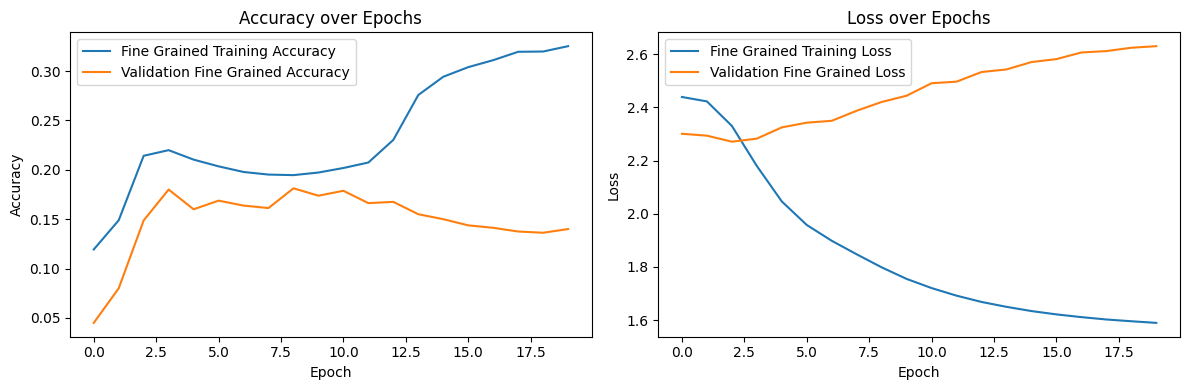

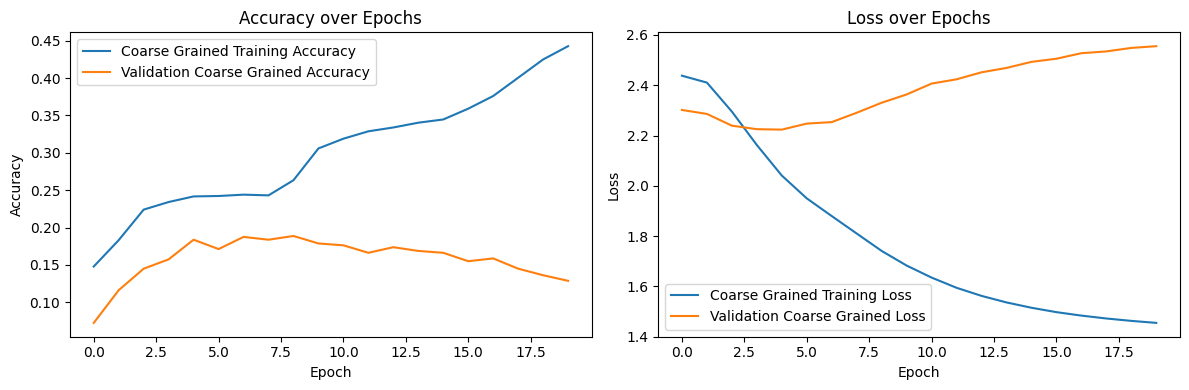

In [21]:
import matplotlib.pyplot as plt

# Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['fine_grained_accuracy'], label='Fine Grained Training Accuracy')
plt.plot(history.history['val_fine_grained_accuracy'], label='Validation Fine Grained Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['fine_grained_loss'], label='Fine Grained Training Loss')
plt.plot(history.history['val_fine_grained_loss'], label='Validation Fine Grained Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['coarse_grained_accuracy'], label='Coarse Grained Training Accuracy')
plt.plot(history.history['val_coarse_grained_accuracy'], label='Validation Coarse Grained Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['coarse_grained_loss'], label='Coarse Grained Training Loss')
plt.plot(history.history['val_coarse_grained_loss'], label='Validation Coarse Grained Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
# Evaluate the model on the test set
y_pred = model.predict(padded_test_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(padded_test_sequences)
y_pred_classes = np.round(y_pred)
y_test_classes= test_labels_one_hot


85/85 [==============================] - 0s 5ms/step


Test AUC: 0.5435443416028335
Test Recall: 0.09458962090541038
Test F1-score: 0.16963696369636966
Test Precision: 0.8210862619808307
Confusion Matrix:


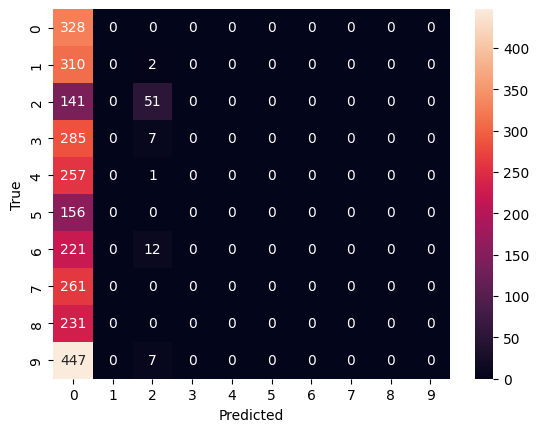

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes[0], multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes[0], average='micro')
f1 = f1_score(y_test_classes, y_pred_classes[0], average='micro')
precision = precision_score(y_test_classes, y_pred_classes[0], average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes[0], axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test AUC: 0.5318416344219952
Test Recall: 0.07839528892160472
Test F1-score: 0.14391891891891892
Test Precision: 0.8765432098765432
Confusion Matrix:


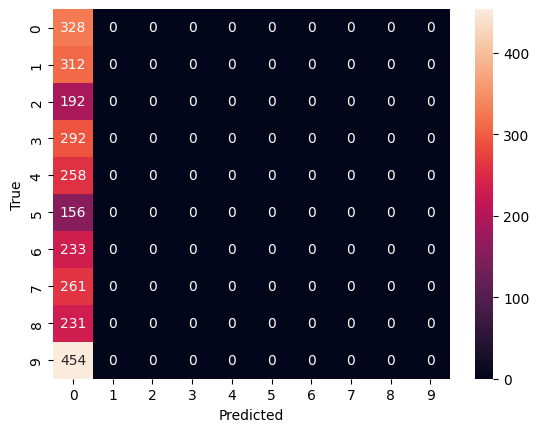

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes[1], multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes[1], average='micro')
f1 = f1_score(y_test_classes, y_pred_classes[1], average='micro')
precision = precision_score(y_test_classes, y_pred_classes[1], average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes[1], axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()